## Import Required Libraries

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr

# Set up matplotlib for better visualization
plt.rcParams['figure.figsize'] = (10, 6)

## Load and Prepare Image

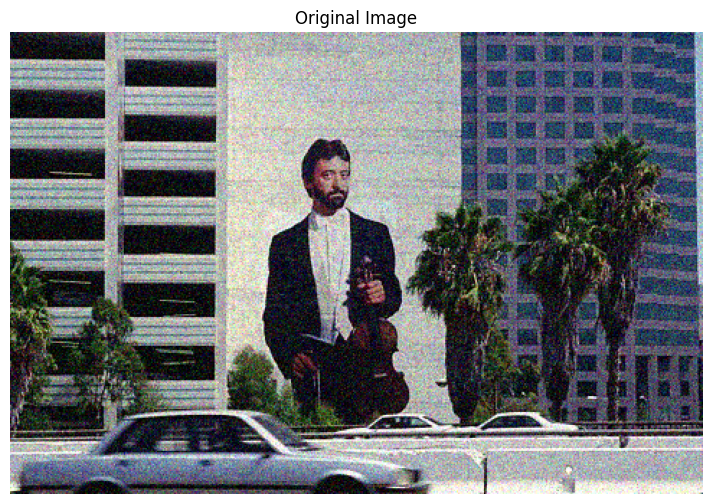

In [3]:
# Load the original image
image_path = 'assets/noise/0018.png'
original_image = cv2.imread(image_path)

# Convert BGR to RGB for proper display with matplotlib
original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

# Display original image
plt.imshow(original_image_rgb)
plt.title('Original Image')
plt.axis('off')
plt.show()

## Apply Filtering Techniques

### 1. Mean Filter

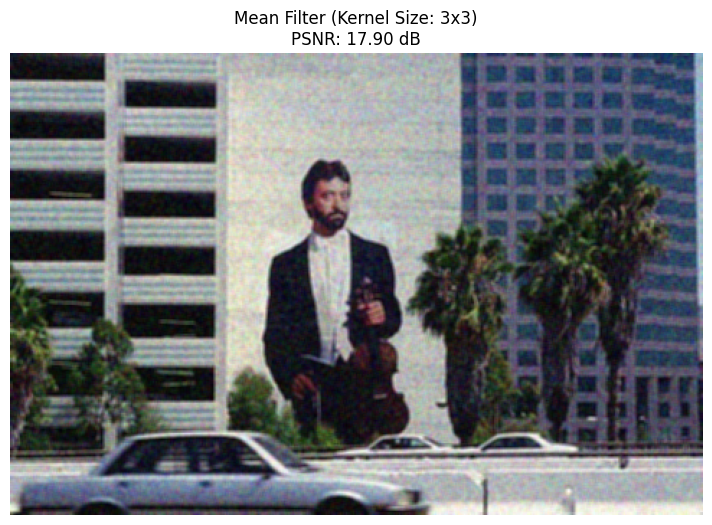

Mean Filter - PSNR: 17.90 dB


In [23]:
# Apply Mean Filter
kernel_size = 3  # You can adjust this value
mean_filtered = cv2.blur(original_image_rgb, (kernel_size, kernel_size))

# Calculate PSNR for Mean Filter
psnr_mean = psnr(original_image, mean_filtered)

# Display result
plt.imshow(mean_filtered)
plt.title(f'Mean Filter (Kernel Size: {kernel_size}x{kernel_size})\nPSNR: {psnr_mean:.2f} dB')
plt.axis('off')
plt.show()

print(f"Mean Filter - PSNR: {psnr_mean:.2f} dB")

### 2. Median Filter

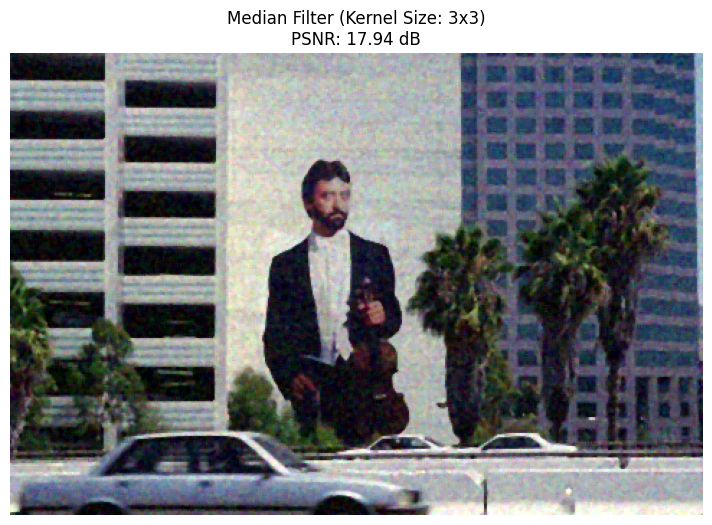

Median Filter - PSNR: 17.94 dB


In [24]:
# Apply Median Filter
kernel_size_median = 3  # Must be odd number
median_filtered = cv2.medianBlur(original_image_rgb, kernel_size_median)

# Calculate PSNR for Median Filter
psnr_median = psnr(original_image, median_filtered)

# Display result
plt.imshow(median_filtered)
plt.title(f'Median Filter (Kernel Size: {kernel_size_median}x{kernel_size_median})\nPSNR: {psnr_median:.2f} dB')
plt.axis('off')
plt.show()

print(f"Median Filter - PSNR: {psnr_median:.2f} dB")

### 2.5. Weighted Median Filter

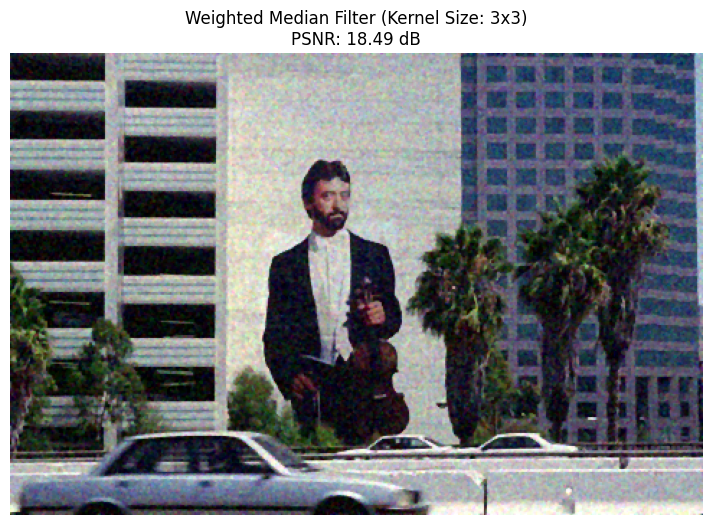

Weighted Median Filter - PSNR: 18.49 dB


In [25]:
def weighted_median_filter(image, kernel_size=3, weights=None):
    """
    Apply weighted median filter to a grayscale image.

    Parameters:
    - image: Input grayscale image
    - kernel_size: Size of the filter kernel
    - weights: Weight matrix for the kernel. If None, uses default weights.

    Returns:
    - Filtered image
    """

    # Create default weights if not provided
    if weights is None:
            weights = np.array([[1, 2, 1],
                               [2, 4, 2],
                               [1, 2, 1]])

    # Pad the image
    pad_width = kernel_size // 2
    padded_image = np.pad(image, pad_width, mode='edge')

    # Initialize output image
    filtered_image = np.zeros_like(image)

    # Apply weighted median filter
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            # Extract neighborhood
            neighborhood = padded_image[i:i+kernel_size, j:j+kernel_size]

            # Create weighted list of pixel values
            weighted_pixels = []
            for ki in range(kernel_size):
                for kj in range(kernel_size):
                    pixel_value = neighborhood[ki, kj]
                    weight = weights[ki, kj]
                    # Replicate pixel value according to its weight
                    weighted_pixels.extend([pixel_value] * int(weight))

            # Find the median of weighted pixels
            filtered_image[i, j] = np.median(weighted_pixels)

    return filtered_image.astype(np.uint8)

# Apply Weighted Median Filter to each RGB channel
kernel_size_weighted_median = 3
weighted_median_filtered = np.zeros_like(original_image_rgb)

# Apply filter to each channel separately
for channel in range(3):
    weighted_median_filtered[:, :, channel] = weighted_median_filter(original_image_rgb[:, :, channel])

# Calculate PSNR for Weighted Median Filter
psnr_weighted_median = psnr(original_image, weighted_median_filtered)

# Display result
plt.imshow(weighted_median_filtered)
plt.title(f'Weighted Median Filter (Kernel Size: {kernel_size_weighted_median}x{kernel_size_weighted_median})\nPSNR: {psnr_weighted_median:.2f} dB')
plt.axis('off')
plt.show()

print(f"Weighted Median Filter - PSNR: {psnr_weighted_median:.2f} dB")

### 3. Gaussian Filter

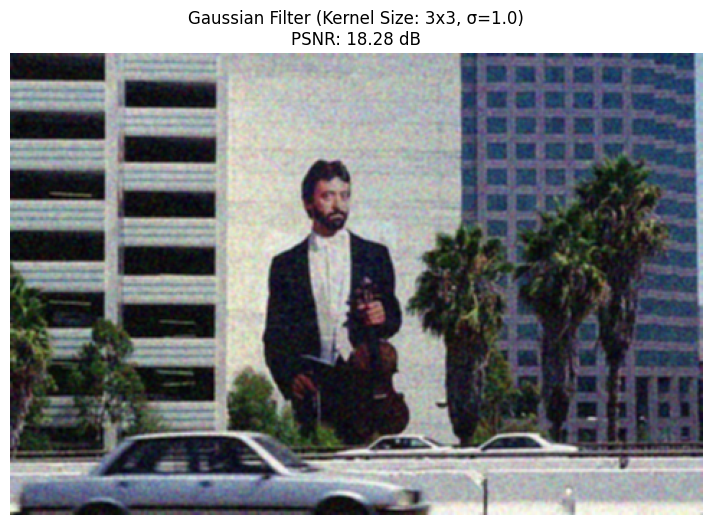

Gaussian Filter - PSNR: 18.28 dB


In [26]:
# Apply Gaussian Filter
kernel_size_gaussian = 3  # Must be odd number
sigma_gaussian = 1.0  # Standard deviation
gaussian_filtered = cv2.GaussianBlur(original_image_rgb, (kernel_size_gaussian, kernel_size_gaussian), sigma_gaussian)

# Calculate PSNR for Gaussian Filter
psnr_gaussian = psnr(original_image, gaussian_filtered)

# Display result
plt.imshow(gaussian_filtered)
plt.title(f'Gaussian Filter (Kernel Size: {kernel_size_gaussian}x{kernel_size_gaussian}, σ={sigma_gaussian})\nPSNR: {psnr_gaussian:.2f} dB')
plt.axis('off')
plt.show()

print(f"Gaussian Filter - PSNR: {psnr_gaussian:.2f} dB")

## Compare All Results

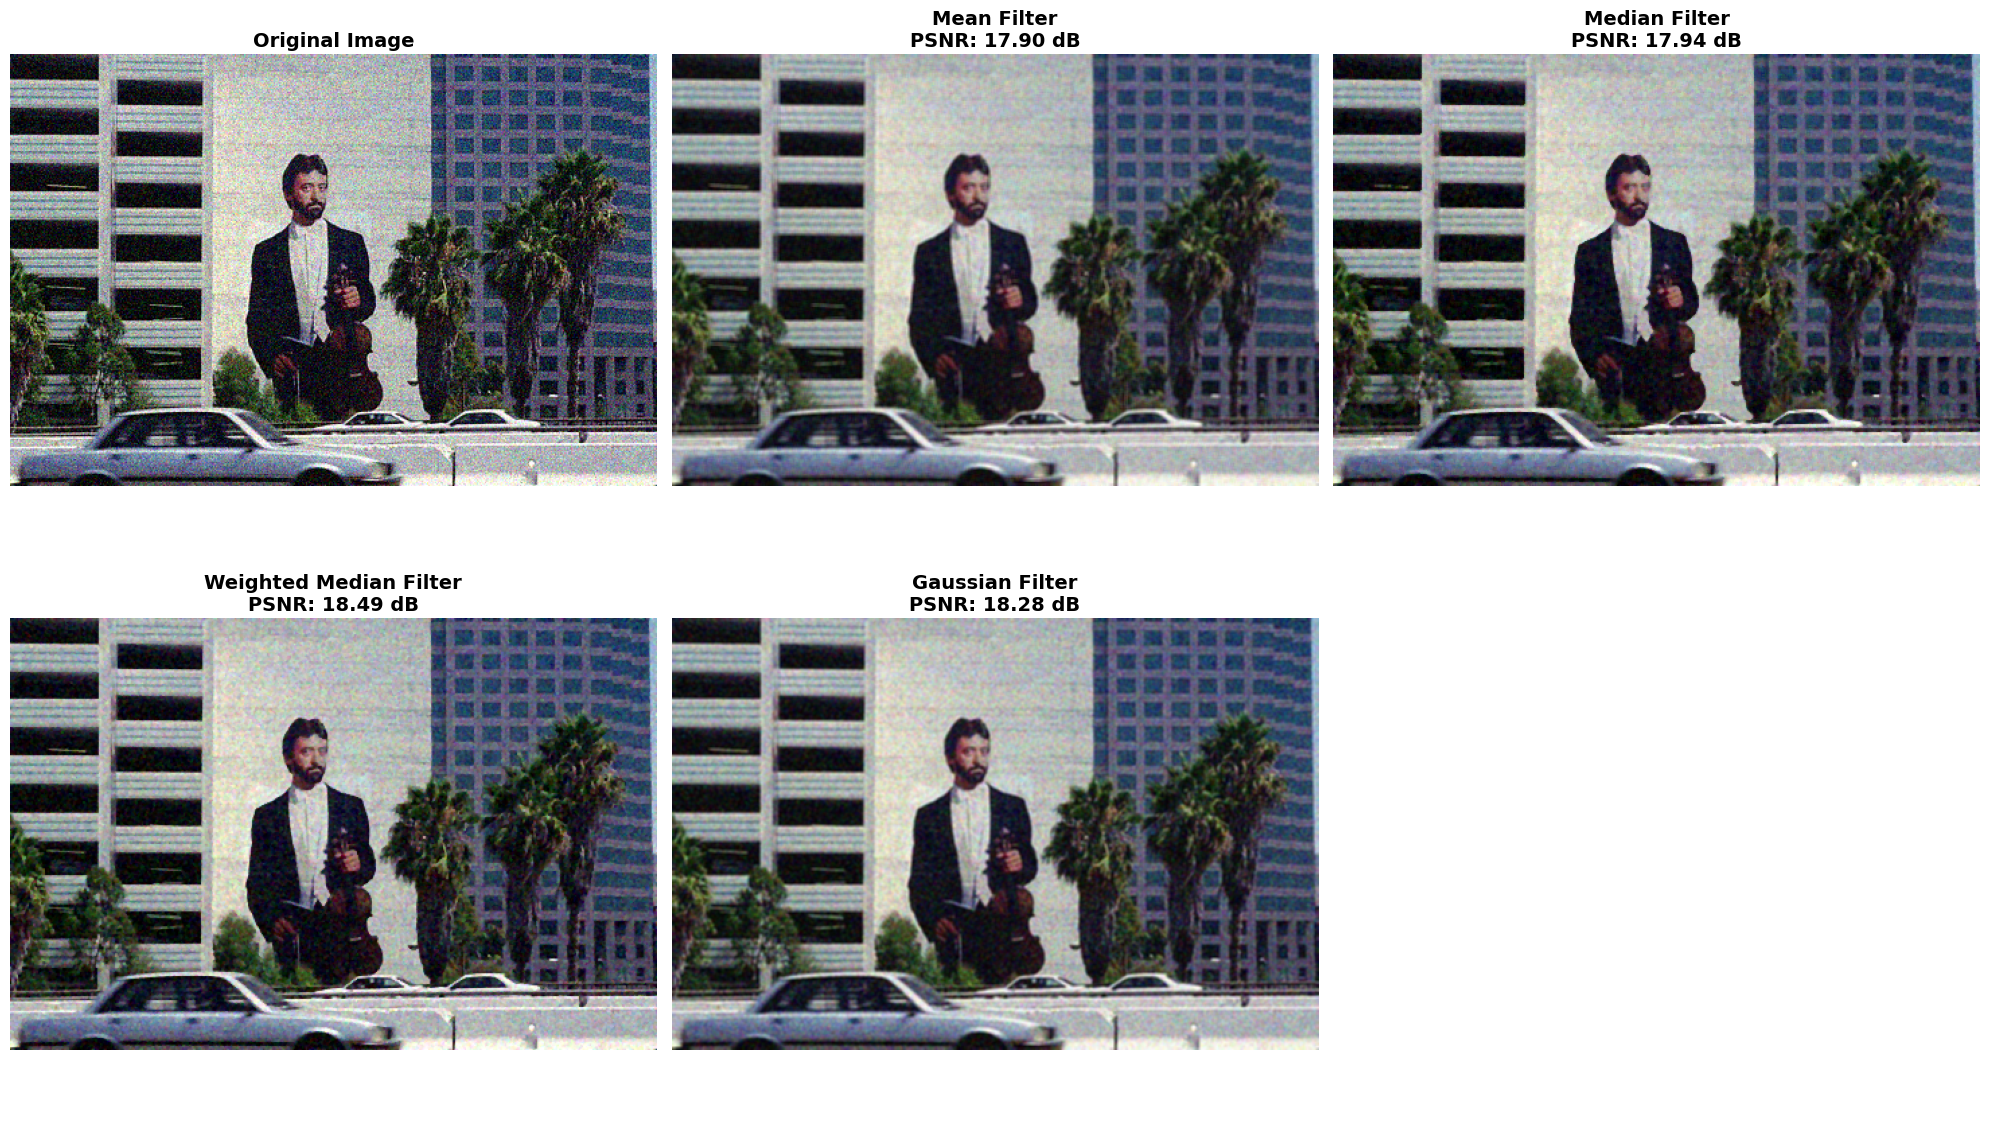

In [27]:
# Display all images side by side
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# Original image
axes[0, 0].imshow(original_image_rgb)
axes[0, 0].set_title('Original Image', fontsize=14, fontweight='bold')
axes[0, 0].axis('off')

# Mean filtered
axes[0, 1].imshow(mean_filtered)
axes[0, 1].set_title(f'Mean Filter\nPSNR: {psnr_mean:.2f} dB', fontsize=14, fontweight='bold')
axes[0, 1].axis('off')

# Median filtered
axes[0, 2].imshow(median_filtered)
axes[0, 2].set_title(f'Median Filter\nPSNR: {psnr_median:.2f} dB', fontsize=14, fontweight='bold')
axes[0, 2].axis('off')

# Weighted Median filtered
axes[1, 0].imshow(weighted_median_filtered)
axes[1, 0].set_title(f'Weighted Median Filter\nPSNR: {psnr_weighted_median:.2f} dB', fontsize=14, fontweight='bold')
axes[1, 0].axis('off')

# Gaussian filtered
axes[1, 1].imshow(gaussian_filtered)
axes[1, 1].set_title(f'Gaussian Filter\nPSNR: {psnr_gaussian:.2f} dB', fontsize=14, fontweight='bold')
axes[1, 1].axis('off')

# Hide the last subplot
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()